# Este es un modelo de Repartija de ganancias

In [1]:
#%load repartija.py

Acá vamos a ver un ejemplo clásico de uso

In [2]:
from repartija import Repartija

r = Repartija()
r.set_precios_por_hora({'martin': 230, 'mauro': 170})
r.set_trabajo({'martin': 10, 'mauro': 20})

for method in [
    'ajuste',
    'ganancia_individual',
    'precio_deceado',
    'precio_medio_por_hora',
    'precio_real',
    'precios_por_hora_ajustado',
    'total_de_horas_trabajadas',
    ]:
    print(method, getattr(r, method)()) 

('ajuste', 1.0526315789473684)
('ganancia_individual', {'mauro': 3578.9473684210525, 'martin': 2421.052631578947})
('precio_deceado', 5700.0)
('precio_medio_por_hora', 200.0)
('precio_real', 6000.0)
('precios_por_hora_ajustado', {'mauro': 178.94736842105263, 'martin': 242.1052631578947})
('total_de_horas_trabajadas', 30.0)


## Unittesting del modelo Repartija

La idea es verificar que el modelo hace al menos las cosas que nos parecen rasonables

In [3]:
#%load tests.py

In [4]:
%run tests.py  

....
----------------------------------------------------------------------
Ran 4 tests in 0.002s

OK


## Gráficos al cambiar la relación de precios individuales

Se hace un barrido de horas trabajadas por uno de los individuos, determinando las horas trabajadas por el otro como el complemento de manera que el total sume siempre 30 horas.

In [5]:
%pylab inline

from repartija import Repartija

r = Repartija()

horas_totales = 30

def horas_complementarias(horas):
    return {'martin': horas_totales - horas,
            'mauro' : horas}

def graficar(precios_por_hora, generador_de_horas=horas_complementarias):
    r.set_precios_por_hora(precios_por_hora)
    
    def plot_metrica(metodo):
        metrica_individuos = {individuo: [] for individuo in r.individuos()}
        horas_trabajadas_list = arange(0, horas_totales+.001, .1)
        for horas_trabajadas in horas_trabajadas_list:
            r.set_trabajo(generador_de_horas(horas_trabajadas))
            metrica = getattr(r, metodo)()
            for individuo in r.individuos():
                metrica_individuos[individuo].append(metrica[individuo])

        for individuo, metrica in metrica_individuos.items():
            plot(horas_trabajadas_list, metrica, label=individuo)
        ylabel(metodo)
        xlabel('Horas trabajadas por Mauro, complemento de Martin en 30 horas')

    figure(figsize(16,10))
    subplot(211)
    plot_metrica('ganancia_individual')
    grid(True)
    legend(loc=0)
    subplot(212)
    plot_metrica('precios_por_hora_ajustado')
    grid(True)
    legend(loc=0)
    show()

Populating the interactive namespace from numpy and matplotlib


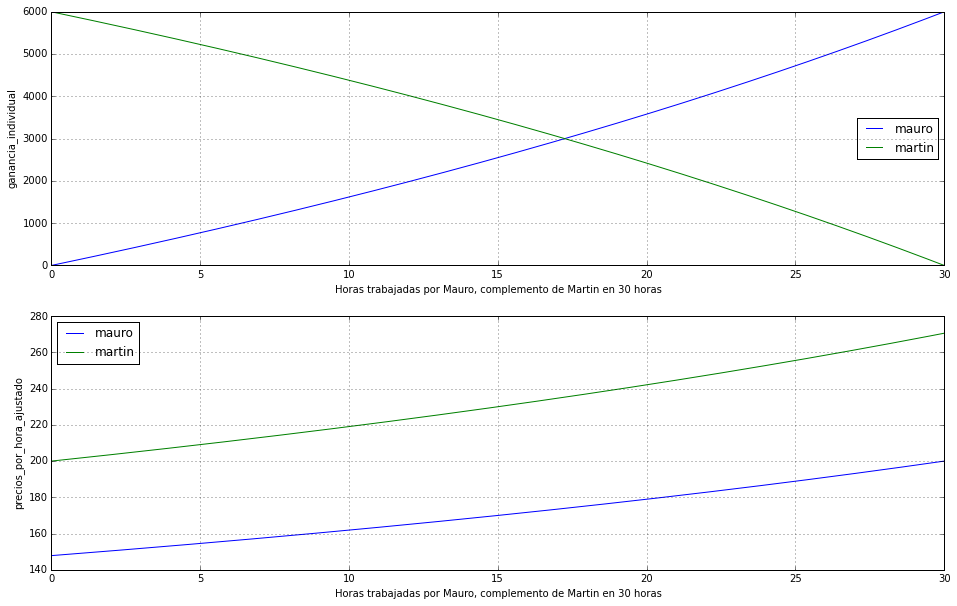

In [6]:
graficar({'martin': 230, 'mauro': 170})

Del cruce de las 2 curvas de `ganancia_individual` se ve que el punto no está justo al medio (15 horas cada uno), como lo sería en el caso que cada individuo cobrara lo mismo por hora, sino que se ve que Mauro tiene que trabajar más horas que Martin para lograr una misma ganancia.

Del gráfico de `precios_por_hora_ajustado` se puede ver cómo siempre que sólo uno trabaja el precio converge en 200, es decir al valor expuesto al cliente (`precio_medio_por_hora`).

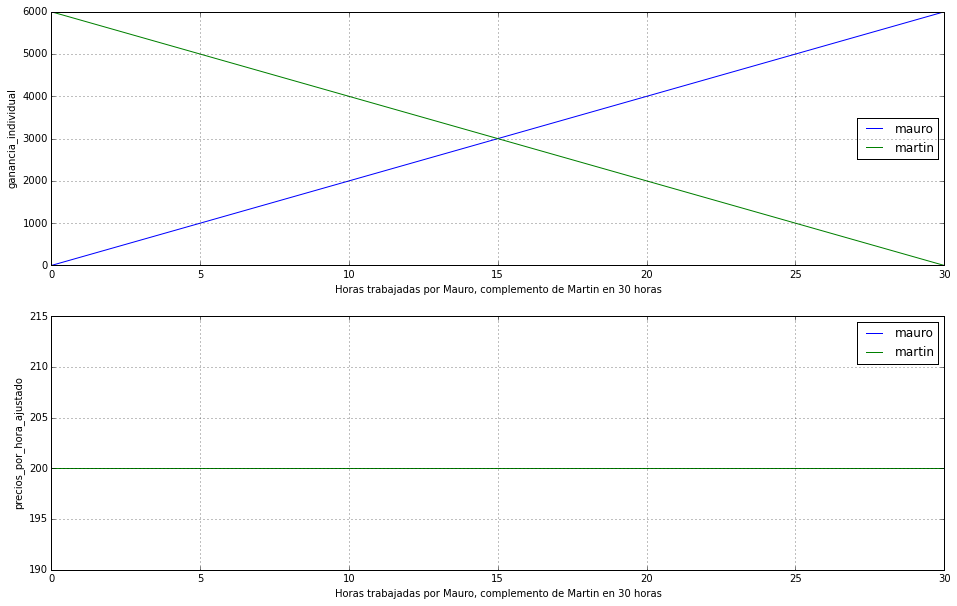

In [7]:
graficar({'martin': 200, 'mauro': 200}) # Igual precio horario

Te invitamos que pruebes valores diferentes de precio por hora

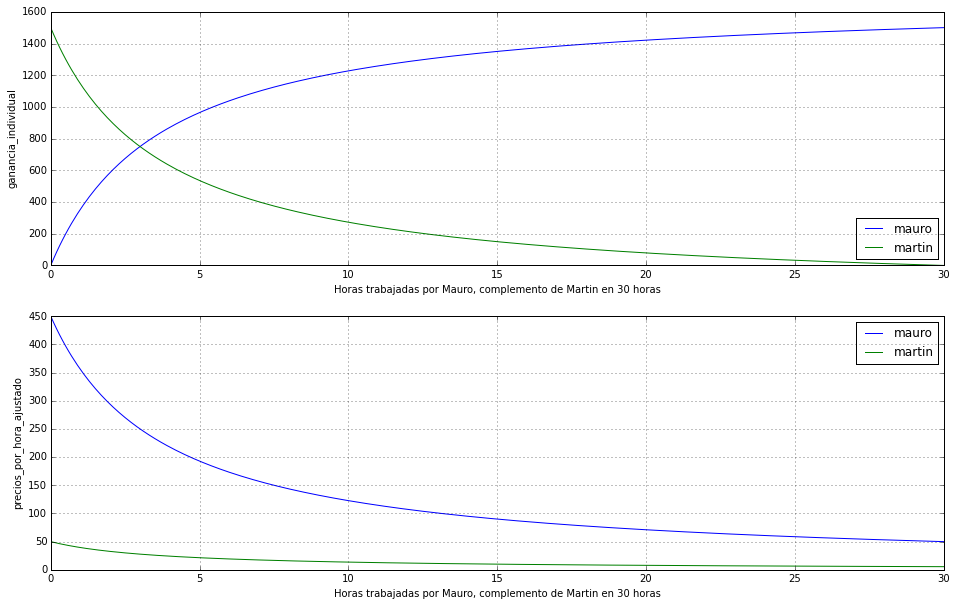

In [8]:
graficar({'martin': 10, 'mauro': 90})

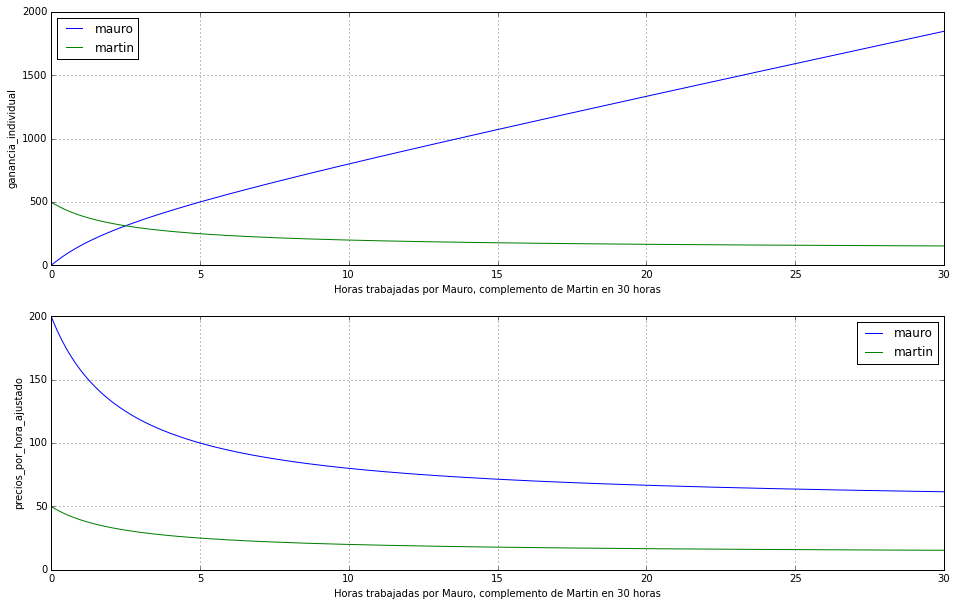

In [9]:
def horas_martin_fija_mauro_variable(horas):
    return {'martin': 10,
            'mauro' : horas}

graficar({'martin': 20, 'mauro': 80}, horas_martin_fija_mauro_variable)